# Overlapping URLs

This notebook is used to aggregate the two different URLs dataset.

In [1]:
import re
from url_normalize import url_normalize
from scrapy.utils.url import canonicalize_url
import pandas as pd

from matplotlib_venn import venn2
from matplotlib import pyplot as plt

# 0. Import the dataset

Both (**preprocessed**) dataset are imported: referenced external links and all Wikipedia pages external links.

In [2]:
df_ref = pd.read_csv('references/url_ref_norm.tsv', sep='\t')
df_ref

,page_id,URL,URL_n,domain
0,39495284,http://www.columbia.edu/cu/lweb/digital/collec...,columbia.edu/cu/lweb/digital/collections/cul/t...,columbia.edu
1,3528721,http://allafrica.com/stories/200512190886.html,allafrica.com/stories/200512190886.html,allafrica.com
2,8552398,https://www.nytimes.com/1997/07/27/magazine/th...,nytimes.com/1997/07/27/magazine/the-thin-red-l...,nytimes.com
3,23782313,https://www.nytimes.com/2005/07/19/arts/televi...,nytimes.com/2005/07/19/arts/television/19heff....,nytimes.com
4,17288329,http://www.ancientlibrary.com/smith-bio/0075.html,ancientlibrary.com/smith-bio/0075.html,ancientlibrary.com
...,...,...,...,...
24671441,373399,http://ndl.go.jp/en/aboutus/outline/numericall...,ndl.go.jp/en/aboutus/outline/numerically.html,ndl.go.jp
24671442,60454512,https://www.foxnews.com/us/navy-seal-widows-me...,foxnews.com/us/navy-seal-widows-memorial-day-e...,foxnews.com
24671443,12708513,http://english.chosun.com/site/data/html_dir/2...,english.chosun.com/site/data/html_dir/2013/06/...,english.chosun.com
24671444,38784960,http://lat.rtrs.tv/plus/tekst.php?c=4&pismo=la...,lat.rtrs.tv/plus/tekst.php?c=4&id=3043&pismo=lat,lat.rtrs.tv


In [2]:
df_ext = pd.read_csv('url_normalization/url_ext_norm.tsv', sep='\t')
df_ext

,page_id,URL,URL_n,domain
0,3850540,http://www.housing.berkeley.edu/housing/,housing.berkeley.edu/housing,housing.berkeley.edu
1,3850540,http://www.freebornhall.com/History/ResidenceH...,freebornhall.com/History/ResidenceHalls,freebornhall.com
2,840171,http://www.kloster-einsiedeln.ch,kloster-einsiedeln.ch,kloster-einsiedeln.ch
3,1290279,http://www.erbzine.com/mag1/0117.html,erbzine.com/mag1/0117.html,erbzine.com
4,3856533,http://freepages.genealogy.rootsweb.com/~vanrc...,freepages.genealogy.rootsweb.com/~vanrcwisner/...,freepages.genealogy.rootsweb.com
...,...,...,...,...
71434204,3889279,https://www.rnz.co.nz/news/political/419769/pr...,rnz.co.nz/news/political/419769/prisoner-votin...,rnz.co.nz
71434205,67209044,https://www.thewi.org.uk/about-us/history-of-t...,thewi.org.uk/about-us/history-of-the-wi,thewi.org.uk
71434206,851024,https://www.imdb.com/name/nm0004133/,imdb.com/name/nm0004133,imdb.com
71434207,851024,https://www.imdb.com/name/nm6662944/,imdb.com/name/nm6662944,imdb.com


## 0.1 Preprocessing

In [4]:
df_ref['URL_n'] = df_ref['URL_n'].str.lower()
df_ref['domain'] = df_ref['domain'].str.lower()
df_ext['URL_n'] = df_ext['URL_n'].str.lower()
df_ext['domain'] = df_ext['domain'].str.lower()

In [5]:
df_ref['id'] = df_ref['page_id'].astype(str) + '-' + df_ref['URL_n']
df_ext['id'] = df_ext['page_id'].astype(str) + '-' + df_ext['URL_n']

# 1. Overlapping

## 1.1 URLs

There are a huge difference between them, but the external links dataset include also other Wikipedia pages (talks...).

In [5]:
l_ref = list(set(df_ref['URL_n'].tolist()))
print(len(l_ref))

l_ext = list(set(df_ext['URL_n'].tolist()))
print(len(l_ext))

18487422
51179410


In [12]:
overlap = set(l_ref) & set(l_ext)
100*len(overlap)/18487422

## 1.2 Mentions

In [6]:
overlap = set(df_ref['id'].tolist()) & set(df_ext['id'].tolist()) 

In [7]:
100*len(overlap)/len(set(df_ref['id'].tolist()))

95.21247637171867

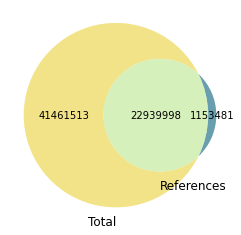

In [8]:
venn2(subsets = (len(set(df_ext['id'].tolist()))-len(overlap), len(set(df_ref['id'].tolist()))-len(overlap), len(overlap)), set_labels = ('Total', 'References'), set_colors=('#eed856', '#2a768c'), alpha = 0.7)

### 1.2.1 Concat

In [11]:
df_ref[-df_ref['id'].isin(overlap)]

,page_id,URL,URL_n,domain,id
11,391320,https://www.sciencedirect.com/science/article/...,sciencedirect.com/science/article/pii/s0041010...,sciencedirect.com,391320-sciencedirect.com/science/article/pii/s...
61,20707,https://books.google.com/books?id=-CojUQpSS6wC,books.google.com/?id=-cojuqpss6wc,books.google.com,20707-books.google.com/?id=-cojuqpss6wc
64,26791,http://latimesblogs.latimes.com/culturemonster...,latimesblogs.latimes.com/culturemonster/2009/0...,latimesblogs.latimes.com,26791-latimesblogs.latimes.com/culturemonster/...
68,18036526,https://www.premierpostal.com/cgi-bin/wsProd.s...,premierpostal.com/cgi-bin/wsprod.sh/viewpocdwr...,premierpostal.com,18036526-premierpostal.com/cgi-bin/wsprod.sh/v...
70,568996,https://www.premierpostal.com/cgi-bin/wsProd.s...,premierpostal.com/cgi-bin/wsprod.sh/viewpocdwr...,premierpostal.com,568996-premierpostal.com/cgi-bin/wsprod.sh/vie...
...,...,...,...,...,...
24671233,1485927,https://www.yucatan.com.mx/deportes/asi-se-viv...,yucatan.com.mx/deportes/asi-se-vivio-clasico-y...,yucatan.com.mx,1485927-yucatan.com.mx/deportes/asi-se-vivio-c...
24671260,63170193,https://www3.nhk.or.jp/nhkworld/en/news/202004...,nhk.or.jp/nhkworld/en/news/20200406_37,nhk.or.jp,63170193-nhk.or.jp/nhkworld/en/news/20200406_37
24671307,32181061,http://www.theflystop.com/carp-throwdown,theflystop.com/carp-throwdown,theflystop.com,32181061-theflystop.com/carp-throwdown
24671348,6038330,https://www.feelingsexy.com.au/midnight-fantas...,feelingsexy.com.au/midnight-fantasy-by-britney...,feelingsexy.com.au,6038330-feelingsexy.com.au/midnight-fantasy-by...


In [12]:
df_ext =  pd.concat([df_ext, df_ref[-df_ref['id'].isin(overlap)]], ignore_index=True)
df_ext['ref'] = 0
df_ext

,page_id,URL,URL_n,domain,id,ref
0,3850540,http://www.housing.berkeley.edu/housing/,housing.berkeley.edu/housing,housing.berkeley.edu,3850540-housing.berkeley.edu/housing,0
1,3850540,http://www.freebornhall.com/History/ResidenceH...,freebornhall.com/history/residencehalls,freebornhall.com,3850540-freebornhall.com/history/residencehalls,0
2,840171,http://www.kloster-einsiedeln.ch,kloster-einsiedeln.ch,kloster-einsiedeln.ch,840171-kloster-einsiedeln.ch,0
3,1290279,http://www.erbzine.com/mag1/0117.html,erbzine.com/mag1/0117.html,erbzine.com,1290279-erbzine.com/mag1/0117.html,0
4,3856533,http://freepages.genealogy.rootsweb.com/~vanrc...,freepages.genealogy.rootsweb.com/~vanrcwisner/...,freepages.genealogy.rootsweb.com,3856533-freepages.genealogy.rootsweb.com/~vanr...,0
...,...,...,...,...,...,...
72613013,1485927,https://www.yucatan.com.mx/deportes/asi-se-viv...,yucatan.com.mx/deportes/asi-se-vivio-clasico-y...,yucatan.com.mx,1485927-yucatan.com.mx/deportes/asi-se-vivio-c...,0
72613014,63170193,https://www3.nhk.or.jp/nhkworld/en/news/202004...,nhk.or.jp/nhkworld/en/news/20200406_37,nhk.or.jp,63170193-nhk.or.jp/nhkworld/en/news/20200406_37,0
72613015,32181061,http://www.theflystop.com/carp-throwdown,theflystop.com/carp-throwdown,theflystop.com,32181061-theflystop.com/carp-throwdown,0
72613016,6038330,https://www.feelingsexy.com.au/midnight-fantas...,feelingsexy.com.au/midnight-fantasy-by-britney...,feelingsexy.com.au,6038330-feelingsexy.com.au/midnight-fantasy-by...,0


In [31]:
df_ext.loc[df_ext['id'].isin(df_ref['id'].tolist()), 'ref'] = 1
df_ext.head()

In [34]:
df_ext.to_csv('url_normalization/temp_final.csv', index=False)

In [36]:
ids = list(set(df_ext['URL_n'].tolist()))
dic_id = dict(zip(ids, range(len(ids))))
df_ext['id'] = [dic_id[x] for x in df_ext['URL_n'].tolist()] 

In [37]:
len(ids)

51923982

In [ ]:
df_ext.rename({'id': 'url_id', 'URL_n': 'url'}, axis=1, inplace=True)

In [38]:
links = df_ext[['url_id', 'url', 'domain']].drop_duplicates()
links

,id,URL_n,domain
0,8901930,housing.berkeley.edu/housing,housing.berkeley.edu
1,27381726,freebornhall.com/history/residencehalls,freebornhall.com
2,3466088,kloster-einsiedeln.ch,kloster-einsiedeln.ch
3,13368084,erbzine.com/mag1/0117.html,erbzine.com
4,18259913,freepages.genealogy.rootsweb.com/~vanrcwisner/...,freepages.genealogy.rootsweb.com
...,...,...,...
72613010,33162949,youtube.com/watch?v=nalx_5asxrs,youtube.com
72613011,44807686,youtube.com/watch?v=u8y29scpcv4,youtube.com
72613012,46410197,youtube.com/watch?v=wprxbd48umu,youtube.com
72613013,16502443,yucatan.com.mx/deportes/asi-se-vivio-clasico-y...,yucatan.com.mx


In [39]:
links.to_csv('data/url.tsv', sep='\t', index=False)

In [40]:
df_ext[['page_id','url_id', 'ref']].drop_duplicates().to_csv('url_normalization/page_url.tsv',  sep='\t', index=False)